# Assignment 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
import scipy.constants as const

# Joint prior

The components of the joint prior are

Since the data have uncertainty $\sigma$ and we have two data points, the space they live in is $[d_{obs} - \sigma, d_{obs} + \sigma]\times[d_{obs} - \sigma, d_{obs} + \sigma]$. Since they are uniformly distributed the density is $\frac{1}{(2\sigma)\times(2\sigma)}=\frac{1}{4\sigma^2}$. Or,
$$
p_d = \frac{1}{|\mathcal{D}|}
$$

where $\mathcal{D}$ is the space the 2D space the data live.

The $\rho$ all live in the space $[-500,0]\ kg/m^3$, so for $\Delta\rho^{(1)}$

$$
p_r(\Delta\rho^{(1)}) = \frac{1}{500}
$$

but for $(\Delta\rho^{(2)_1}, \Delta\rho^{(2)_2})$ they live in $[-500,0]\times[-500,0]$ and so

$$
p_r(\Delta\rho^{(2)_1}, \Delta\rho^{(2)_2}) = \frac{1}{500^2}
$$

The hyper parameter $k$ is also uniformly distributed and so

$$
p_k(k) = \frac{1}{2}
$$

The full joint prior is then


$$
p_{d,m,k} = \begin{cases} 
\frac{1}{2}\frac{1}{(r_{max} - r_{min})}\frac{1}{\mathcal{D}} & \text{for k = 1 }\wedge s\in[-500,0]   \\
\frac{1}{2}\frac{1}{(r_{max} - r_{min})^2}\frac{1}{\mathcal{D}} & \text{for k = 2 }\wedge s\in[-500,0]^2 \\
0 \text{ otherwise}
\end{cases}
$$


# Complete posterior

Substituting the forward relation $g(m)$ for $d$ leaves the joint prior with the same terms but conditioned differently. $s,k$ are left unchanged and the forwarded data still live within $D$. But now the values for $m$ that give a non-zero density must obey $g(m)\in D$. So the posterior is

$$
p_{d,m,k}^{post} = \begin{cases} 
\frac{1}{2}\frac{1}{(r_{max} - r_{min})}\frac{1}{\mathcal{D}} & \text{for k = 1 }\wedge g(s)\in[d_{obs} \pm \sigma]   \\
\frac{1}{2}\frac{1}{(r_{max} - r_{min})^2}\frac{1}{\mathcal{D}} & \text{for k = 2 }\wedge g(s_1), g(s_2) \in[d_{obs} \pm \sigma] \\
0 \text{ otherwise}
\end{cases}
$$


The change is that for some values of $s$ that might produce $g$ that are outside of $[d_{obs}\pm\sigma]$.

the posterior will look the same but m is conditioned such that g(m) must be in D.

Same probabilities, since we keep m,k, but it would give 0 if m is outside some region.

Support distribution changes.

# Integrating the complete posterior over $m$ for each $k$

## Computing the forward relations

$$
\Delta g = 2\pi G \Delta\rho [(b_{top} - h_{top}) - (b_{bot} - h_{bot})]
$$

In [124]:

def delta_gk1(delta_rho):
    """
    Computing the forward relation for k=1
    Lots of computations so hopefully it is correct.
    """

    radius = 4700

    k1d1htop = 1000
    k1d1hbot = k1d1htop+4400
    k1d1btop = ma.sqrt(k1d1htop**2 + radius**2)
    k1d1bbot = ma.sqrt(k1d1hbot**2 + radius**2)

    k1d2htop = 500
    k1d2hbot = k1d2htop+4400
    k1d2btop = ma.sqrt(k1d2htop**2 + radius**2)
    k1d2bbot = ma.sqrt(k1d2hbot**2 + radius**2)

    #print(f"k1d1htop :{k1d1htop:.1f}, k1d1hbot :{k1d1hbot:.1f}, k1d1btop :{k1d1btop:.1f}, k1d1bbot :{k1d1bbot:.1f}")
    #print(f"k1d2htop :{k1d2htop:.1f}, k1d2hbot :{k1d2hbot:.1f}, k1d2btop :{k1d2btop:.1f}, k1d2bbot :{k1d2bbot:.1f}")

    k1d1 = 2 * const.pi * const.G * delta_rho * ((k1d1btop-k1d1htop) - (k1d1bbot-k1d1hbot))
    k1d2 = 2 * const.pi * const.G * delta_rho * ((k1d2btop-k1d2htop) - (k1d2bbot-k1d2hbot))

    return k1d1, k1d2



def delta_gk2(delta_rho):
    """
    Computing the forward relation for k=2
    """

    radius = 4700

    ## Top cylinder
    k2d1htopT = 1000
    k2d1hbotT = k2d1htopT+3000
    k2d1btopT = ma.sqrt(k2d1htopT**2 + radius**2)
    k2d1bbotT = ma.sqrt(k2d1hbotT**2 + radius**2)

    k2d2htopT = 500
    k2d2hbotT = k2d2htopT+3000
    k2d2btopT = ma.sqrt(k2d2htopT**2 + radius**2)
    k2d2bbotT = ma.sqrt(k2d2hbotT**2 + radius**2)

    #print()
    #print("Upper cylinder")
    #print(f"k2d1htopT :{k2d1htopT:.1f}, k2d1hbotT :{k2d1hbotT:.1f}, k2d1btopT :{k2d1btopT:.1f}, k2d1bbotT :{k2d1bbotT:.1f}")
    #print(f"k2d2htopT :{k2d2htopT:.1f}, k2d2hbotT :{k2d2hbotT:.1f}, k2d2btopT :{k2d2btopT:.1f}, k2d2bbotT :{k2d2bbotT:.1f}")

    ## Bot cylinder
    k2d1htopB = 1000+3000
    k2d1hbotB = k2d1htopB+1400
    k2d1btopB = ma.sqrt(k2d1htopB**2 + radius**2)
    k2d1bbotB = ma.sqrt(k2d1hbotB**2 + radius**2)

    k2d2htopB = 500+3000
    k2d2hbotB = k2d2htopB+1400
    k2d2btopB = ma.sqrt(k2d2htopB**2 + radius**2)
    k2d2bbotB = ma.sqrt(k2d2hbotB**2 + radius**2)

    #print()
    #print("Lower cylinder")
    #print(f"k2d1htopB :{k2d1htopB:.1f}, k2d1hbotB :{k2d1hbotB:.1f}, k2d1btopB :{k2d1btopB:.1f}, k2d1bbotB :{k2d1bbotB:.1f}")
    #print(f"k2d2htopB :{k2d2htopB:.1f}, k2d2hbotB :{k2d2hbotB:.1f}, k2d2btopB :{k2d2btopB:.1f}, k2d2bbotB :{k2d2bbotB:.1f}")




    k2d1T = 2 * const.pi * const.G * delta_rho * ((k2d1btopT-k2d1htopT) - (k2d1bbotT-k2d1hbotT))
    k2d1B = 2 * const.pi * const.G * delta_rho * ((k2d1btopB-k2d1htopB) - (k2d1bbotB-k2d1hbotB))
    k2d1 = k2d1T+k2d1B

    k2d2T = 2 * const.pi * const.G * delta_rho * ((k2d2btopT-k2d2htopT) - (k2d2bbotT-k2d2hbotT))
    k2d2B = 2 * const.pi * const.G * delta_rho * ((k2d2btopB-k2d2htopB) - (k2d2bbotB-k2d2hbotB))
    k2d2 = k2d2T+k2d2B

    return k2d1, k2d2


def posterior(d,delta_rho,k):
    """
    Computing the posterior.
    Compute values for rho and check if inside d range.
    """
    d_sigma = 1E-5
    conditions = [
        -500 <= delta_rho <= 0,
        1 <= k <= 2
    ]
    if not all(conditions):
        print("Outside parameter space.")
        return 0


    if k==1:
        delta_g = delta_gk1(delta_rho)
        if d[0]-d_sigma <= delta_g[0] <= d[0]+d_sigma and d[1]-d_sigma <= delta_g[1] <= d[1]+d_sigma:
            return (1/2) * (1/500) * (1/(4*d_sigma**2))
        else:
            return 0
    elif k==2:
        delta_g = delta_gk2(delta_rho)
        if d[0]-d_sigma <= delta_g[0] <= d[0]+d_sigma and d[1]-d_sigma <= delta_g[1] <= d[1]+d_sigma:
            return (1/2) * (1/500**2) * (1/(4*d_sigma**2))
        else:
            return 0
    else:
        return 0

def integrate_posterior(N, data, delta_rho_min, delta_rho_max):
    delta_rhos = np.linspace(delta_rho_min,delta_rho_max,N)
    data_arr = np.array([data] * N)
    k1_arr = np.array([1] * N)
    postk1 = []
    postk2 = []
    for i in range(N):
        postk1.append(posterior(data, delta_rhos[i],1))
        postk2.append(posterior(data, delta_rhos[i],2))
    
    return delta_rhos, np.array(postk1), np.array(postk2)


In [125]:
d = np.array([-0.00021453, -0.00024499])

rhos, k1, k2 = integrate_posterior(1000, d, -500, 0)

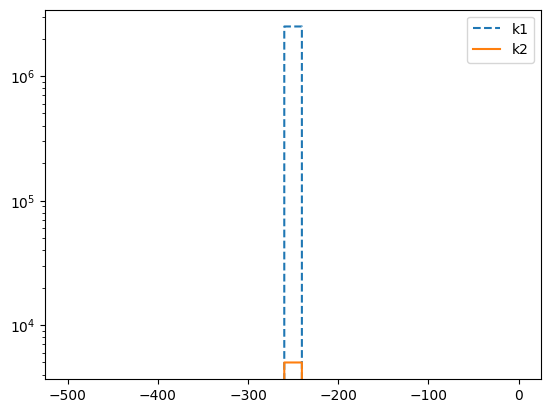

In [126]:
plt.plot(rhos,k1,linestyle="dashed", label="k1")
plt.plot(rhos,k2, label="k2")
plt.yscale("log")
plt.legend()

In [128]:
k1.sum()/k2.sum()

np.float64(500.0)

In [3]:
1E-5

1e-05

In [3]:
gk2(-100)

(-8.581314732288073e-05, -9.799668412154391e-05)

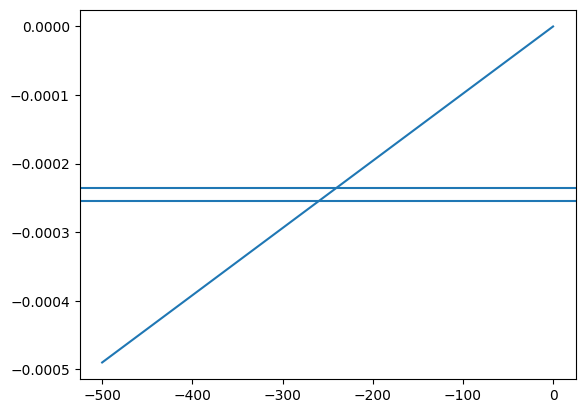

In [63]:
delta_gk1(-100)
x = np.linspace(-500,0,100)
y = np.vectorize(delta_gk1)(x)
plt.plot(x,y[1])
plt.axhline(d[1]+1E-5)
plt.axhline(d[1]-1E-5)

In [67]:
zipped = list(zip(*y))
zipped[0]

(np.float64(-0.0004290657366144036), np.float64(-0.0004899834206077196))

In [ ]:
adsf

Questions for Connor

1. Correct to sum up contributions of top and bottom cylinder?
2. For specific values (-250 k1) I get a large number.


